In [1]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
dataset_path = '/content/gdrive/MyDrive/your_project_folder/'

In [2]:
df = pd.read_csv('dataset.csv')

# EDA(Exploratory Data Analysis)

In [3]:
df.head()

,Unnamed: 0,Fruit,Season,Month,Temp,Deasaster Happen in last 3month,Fruit condition,Price per kg
0,0,banana,winter,jan,15,no,fresh,20
1,1,apple,winter,jan,15,no,fresh,50
2,2,orange,winter,jan,15,no,fresh,70
3,3,peach,winter,jan,15,no,fresh,25
4,4,grape,winter,jan,15,no,fresh,20


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

Consists with numerical as well as categorical features

In [5]:
df.shape

(121, 7)

Has 121 rows with 7 columns

In [6]:
df.columns

Index(['Fruit', 'Season', 'Month', 'Temp', 'Deasaster Happen in last 3month',
       'Fruit condition', 'Price per kg'],
      dtype='object')

7 columns are ['Vegetable', 'Season', 'Month', 'Temp',
       'Deasaster Happen in last 3month', 'Vegetable condition',
       'Price per kg']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
Fruit                              121 non-null object
Season                             121 non-null object
Month                              121 non-null object
Temp                               121 non-null int64
Deasaster Happen in last 3month    121 non-null object
Fruit condition                    121 non-null object
Price per kg                       121 non-null int64
dtypes: int64(2), object(5)
memory usage: 6.7+ KB


No null fields in any column

In [8]:
df.describe()

,Temp,Price per kg
count,121.000000,121.000000
mean,24.892562,55.330579
std,9.319157,48.769934
min,15.000000,9.000000
25%,15.000000,22.000000
50%,27.000000,35.000000
75%,32.000000,70.000000
max,43.000000,250.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

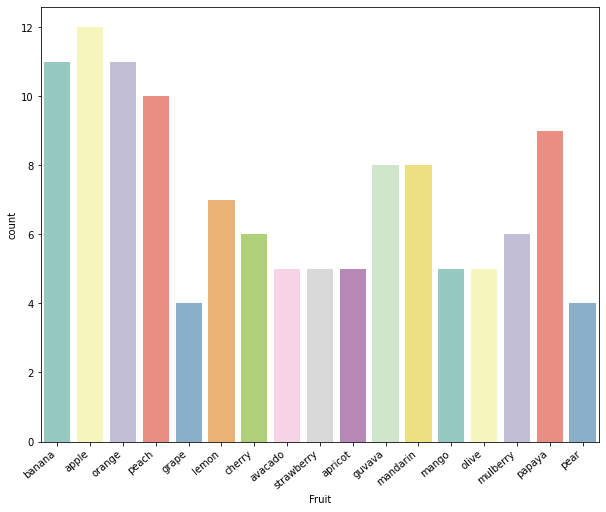

In [10]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Fruit", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

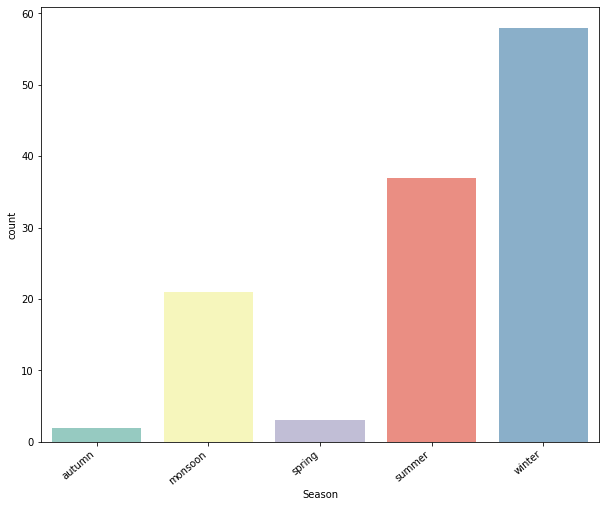

In [11]:
labels_order = sorted(df['Season'].unique())

plt.figure(figsize=(10,8))
ax = sns.countplot(x="Season", data=df, palette="Set3", order=labels_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Most of the records are from WInter and Summer

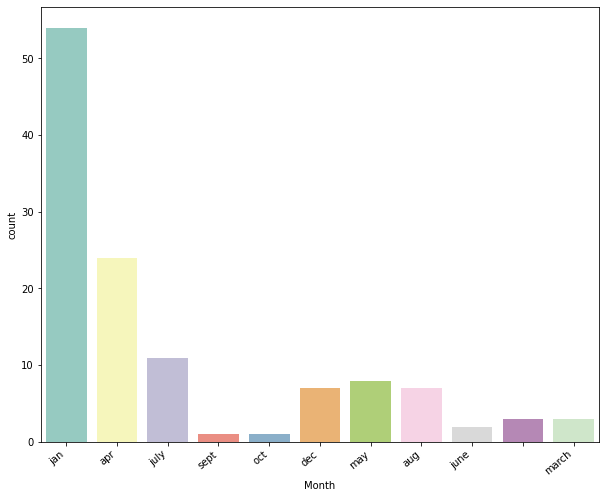

In [12]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Month", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Most of the records are from January and least records are from September and October

**Note: One month is denoted by ' '**

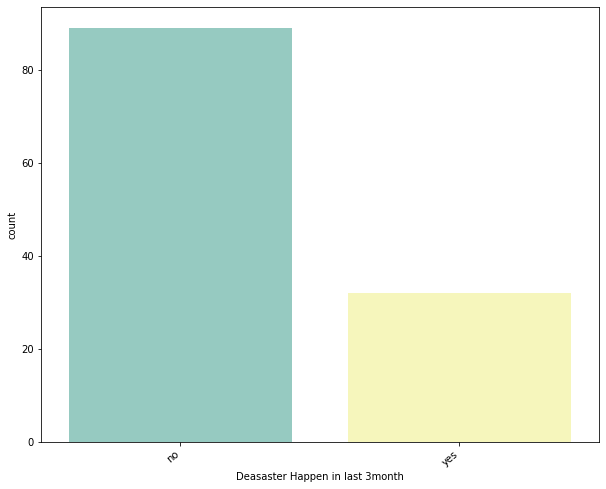

In [13]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Deasaster Happen in last 3month", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

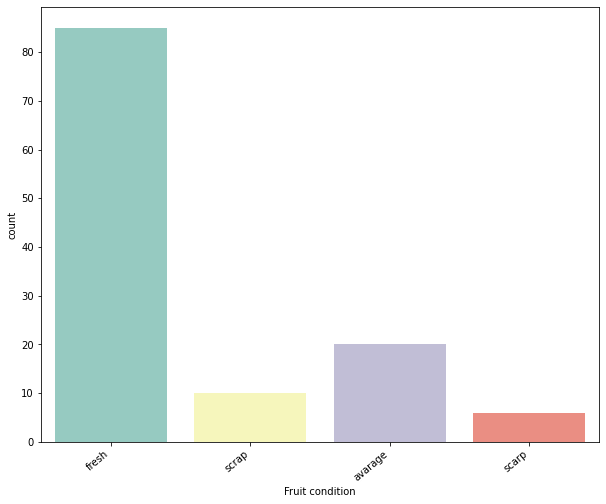

In [14]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="Fruit condition", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

<Figure size 720x576 with 0 Axes>

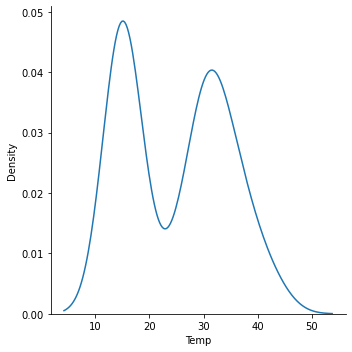

In [15]:
plt.figure(figsize=(10,8))
sns.displot(df, x="Temp", kind="kde")
plt.show()

Bimodal distribution, temperature varies between two main points 15'C and 35'C. We can sperate the data into two categories. 
- mean >
- mean <

<Figure size 720x576 with 0 Axes>

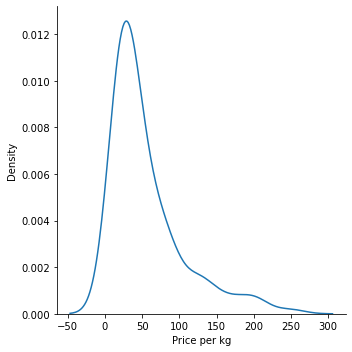

In [16]:
plt.figure(figsize=(10,8))
sns.displot(df, x="Price per kg", kind="kde")
plt.show()

Prices concentrated around $50.00

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x1080 with 0 Axes>

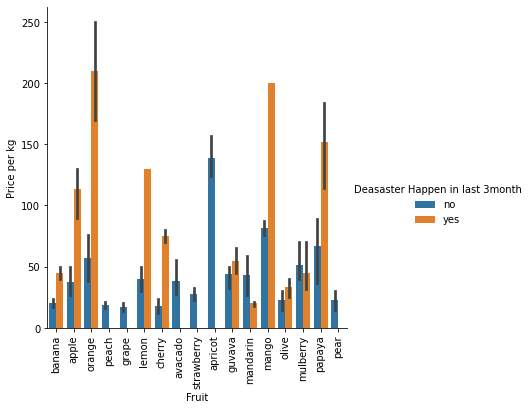

In [17]:
plt.figure(figsize=(15, 15))
ax = sns.catplot('Fruit', 'Price per kg', data=df, hue='Deasaster Happen in last 3month', kind='bar')
for axes in ax.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.show()

- Whenever a disaster happen the price raise canbe detected except for mandarin
- Disasters can highly affect on oranges, lemons, mangoes and papaya

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


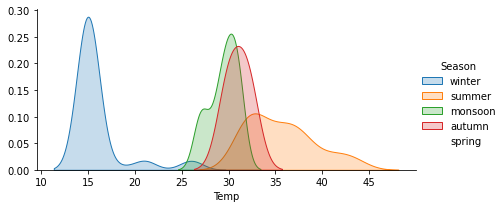

In [18]:
class_wise = sns.FacetGrid(df, hue='Season', aspect=2)
class_wise.map(sns.kdeplot, 'Temp', shade=True)
class_wise.add_legend()
plt.show()

Monsoon, Autum and summer temperatures are concentrated around 30 'C'

# Preprocesing

In [11]:
from sklearn import preprocessing 
from sklearn.compose import ColumnTransformer

In [12]:
onehot_encoder = preprocessing.OneHotEncoder(drop='first')

In [13]:
# OneHotEncoding for nominal columns
def clean_nominal(dataset, columns_nominal):
    """ Method to OneHot Encode columns in dataset selectively"""
    cleaned_dataset = dataset

    for column in columns_nominal:
        X = onehot_encoder.fit_transform(dataset[column].values.reshape(-1, 1)).toarray()
        # create dataframe from encoded data
        dataset_onehot = pd.DataFrame(X, columns = [column + '_' + str(i) for i in range(X.shape[1])]) 
        # update dataset -> cleaned_dataset
        cleaned_dataset = pd.concat(
            [dataset_onehot.reset_index(drop=True), cleaned_dataset.reset_index(drop=True)],
            axis=1)
        # remove encoded column from dataset
        del cleaned_dataset[column]
    return cleaned_dataset

In [14]:
cleaned_df = clean_nominal(df, ['Season', 'Fruit', 'Deasaster Happen in last 3month', 'Fruit condition'])

In [15]:
cleaned_df.head()

,Fruit condition_0,Fruit condition_1,Fruit condition_2,Deasaster Happen in last 3month_0,Fruit_0,Fruit_1,Fruit_2,Fruit_3,Fruit_4,Fruit_5,...,Fruit_13,Fruit_14,Fruit_15,Season_0,Season_1,Season_2,Season_3,Month,Temp,Price per kg
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,jan,15,20
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,jan,15,50
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,jan,15,70
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,jan,15,25
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,jan,15,20


In [16]:
label_encoder = preprocessing.LabelEncoder()

In [17]:
# Label Encoding for ordinal columns
def clean_ordinal(dataset, columns_ordinal):
    """ Method to Label Encode columns in dataset selectively"""
    for column in columns_ordinal:
        dataset[column] = label_encoder.fit_transform(dataset[column])
    return dataset

In [21]:
cleaned_df = clean_ordinal(cleaned_df, ['Month'])
cleaned_df.head()

,Fruit condition_0,Fruit condition_1,Fruit condition_2,Deasaster Happen in last 3month_0,Fruit_0,Fruit_1,Fruit_2,Fruit_3,Fruit_4,Fruit_5,...,Fruit_13,Fruit_14,Fruit_15,Season_0,Season_1,Season_2,Season_3,Month,Temp,Price per kg
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,15,20
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,15,50
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,15,70
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,15,25
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,15,20


In [27]:
def temp_preprocess(val, mean):
    """ Encode Temp column value to numerical based on > mean or < mean """
    if val < mean:
        return 0
    return 1

In [28]:
temp_mean = cleaned_df['Temp'].mean()

cleaned_df['Temp'] = cleaned_df['Temp'].apply(lambda x: temp_preprocess(x, temp_mean))

In [29]:
cleaned_df.head()

,Fruit condition_0,Fruit condition_1,Fruit condition_2,Deasaster Happen in last 3month_0,Fruit_0,Fruit_1,Fruit_2,Fruit_3,Fruit_4,Fruit_5,...,Fruit_13,Fruit_14,Fruit_15,Season_0,Season_1,Season_2,Season_3,Month,Temp,Price per kg
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,20
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,50
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,70
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,25
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,20


##### Corelation Matrix

In [30]:
corr = cleaned_df.corr()

<AxesSubplot:>

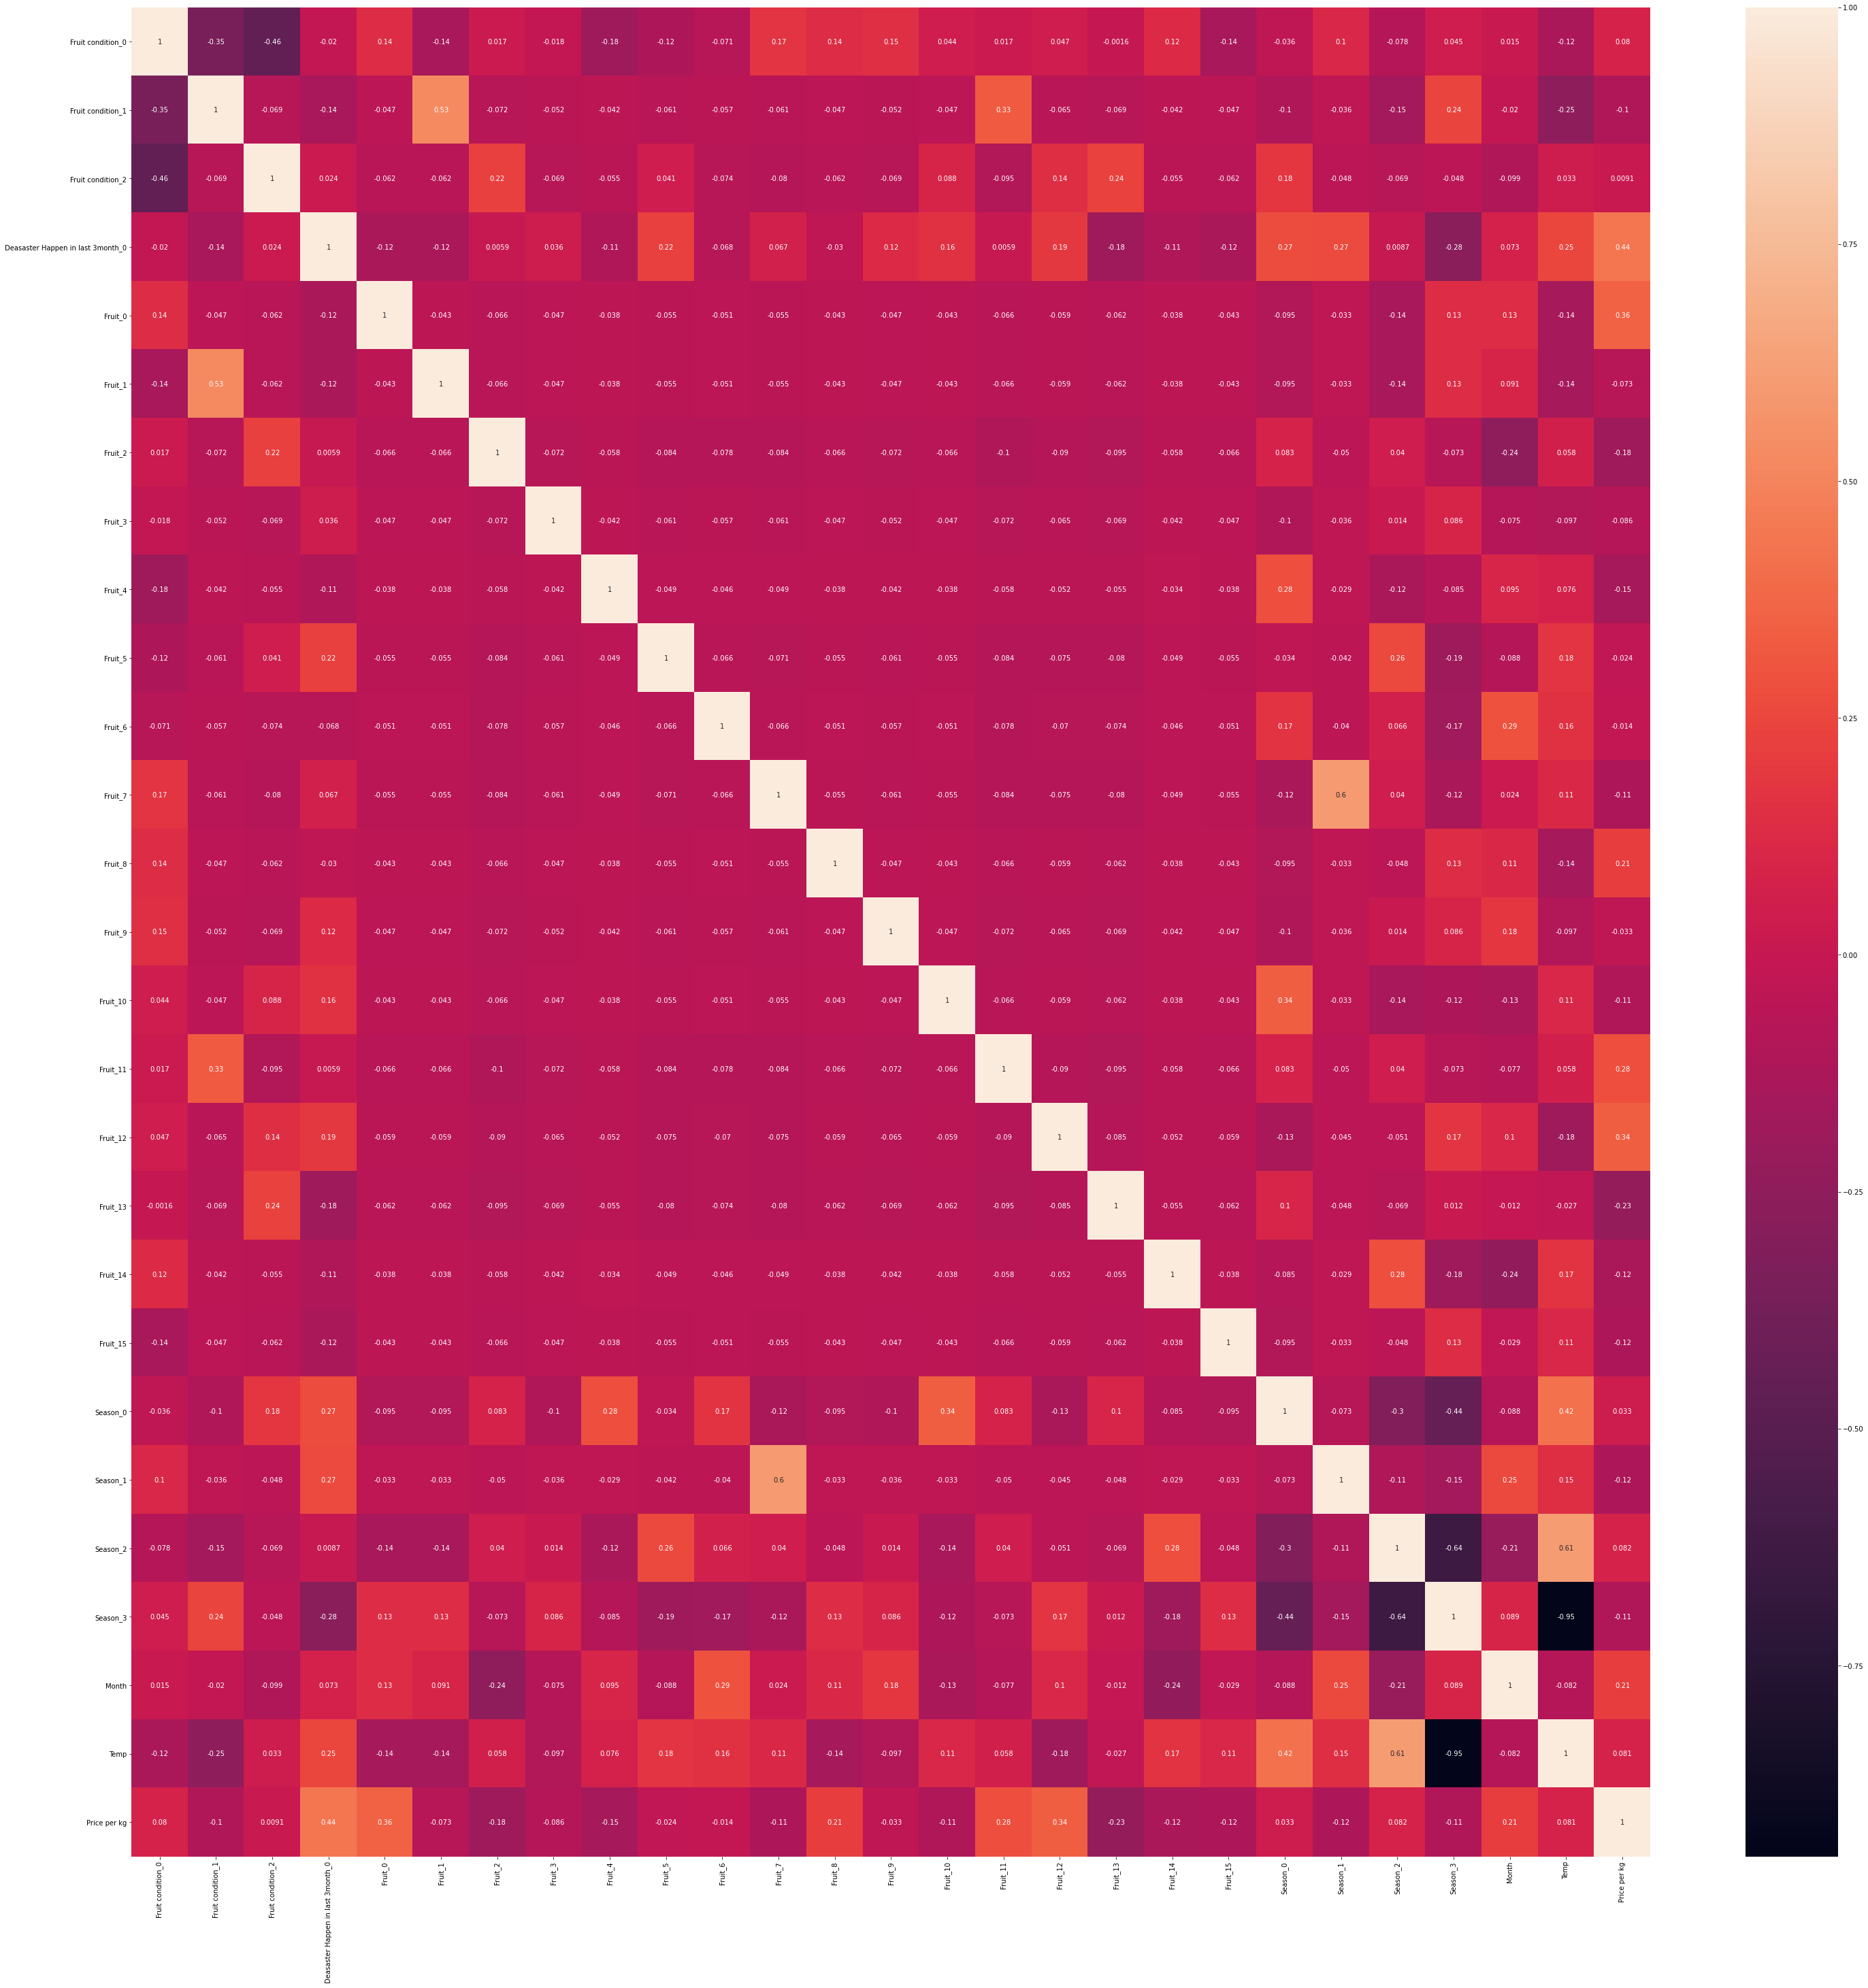

In [31]:
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=True)

Temp and Season_3 are highly corelated(positive)

# X Y Split

In [32]:
# split data into x and y
X = cleaned_df.drop("Price per kg",axis=1)
Y = df["Price per kg"]

In [33]:
# split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
np.random.seed(42)

X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2)

# Model Buliding Evaluation

https://www.imranabdullah.com/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [35]:
classifiers = [
    LogisticRegression(max_iter=200), 
    RandomForestRegressor(),
    SVR()
]

In [36]:
result_table = pd.DataFrame(columns=['classifiers', 'r2_score', 'Mean Squared Error(MSE)', 'Root MSE', 'Mean Absolute Error'])
result_table.head()

,classifiers,r2_score,Mean Squared Error(MSE),Root MSE,Mean Absolute Error


In [37]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, Y_train)
    ypred = model.predict(X_test)
    
    r2 = r2_score(Y_test, ypred)
    mse = mean_squared_error(Y_test, ypred)
    rmse = math.sqrt(mean_squared_error(Y_test, ypred))
    mae = mean_absolute_error(Y_test, ypred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'r2_score': r2,
                                        'Mean Squared Error(MSE)': mse,
                                        'Root MSE': rmse,
                                        'Mean Absolute Error': mae
                                       },
                                       ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [38]:
result_table

,r2_score,Mean Squared Error(MSE),Root MSE,Mean Absolute Error
classifiers,,,,
LogisticRegression,-0.059524,3269.480000,57.179367,33.880000
RandomForestRegressor,0.935143,200.134695,14.146897,10.030146
SVR,-0.113033,3434.598869,58.605451,35.944910


> - Best possible r2_score is 1.0 
> - Mean Squared Error: the lower the value the better and 0 means the model is perfect
> - Mean Absolute Error:  Lower values are better

- so, according to matrices the RandomForestRegressor is the best classifier

# Final Model

In [39]:
# training with best parameters 
rfr = RandomForestRegressor()

In [40]:
rfr.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Save Model

In [41]:
import pickle

file_name = 'fruit_price_predicter.sav'

with open(file_name, 'wb') as f:
    pickle.dump(rfr, f)

#### Test Prediction

In [42]:
rf = pickle.load(open(file_name, 'rb'))

In [43]:
preds = rf.predict(np.array(X.iloc[0].values.tolist()).reshape(1, -1))

In [44]:
preds

array([22.4159127])